## **Notebook EC03**
## Regularized ELM Classifier for the MNIST database. Designed from scratch.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Daniele Souza Gonçalves RA:248029


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
#from keras.datasets import mnist
from keras.datasets import cifar10

(Xp, y), (Xtp, yt) = cifar10.load_data()
Xa = Xp.reshape(Xp.shape[0], 3072)
Xta = Xtp.reshape(Xtp.shape[0], 3072)
y = y.ravel()
yt = yt.ravel()
X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

Shape of X:  (50000, 3072)
Shape of y:  (50000,)
Shape of Xt:  (10000, 3072)
Shape of yt:  (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical
#Converte para representação one-hot e imprime o numero total de exemplos para
#cada classe.
yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)

[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [ ]:
partition = 0.7
#Define 70% pra treinamento e 30% pra teste

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

# ELM X
# We will concatenate a column of 1's to account for the V0 of each hidden neuron later on
X_training_elm = np.concatenate((np.transpose(np.array([np.ones(X_training.shape[0])])), X_training), axis=1)
X_validation_elm = np.concatenate((np.transpose(np.array([np.ones(X_validation.shape[0])])), X_validation), axis=1)

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

print("X_training_elm:".ljust(20), X_training_elm.shape)
print("X_validation_elm:".ljust(20), X_validation_elm.shape)

X_training:          (35000, 3072)
y_training:          (35000, 10)
X_validation:        (15000, 3072)
y_validation:        (15000, 10)
X_training_elm:      (35000, 3073)
X_validation_elm:    (15000, 3073)


In [ ]:
#Determina qual é a classe de uma amostra
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_

In [ ]:
#Implementa a ativação Leaky ReLU que ajuda a evitar o problema de neurônios mortos
def leaky_relu(table):
    return np.where(table > 0, table,  0.02 * table)

#Implementa a função ReLU
def relu(table):
    return np.where(table > 0, table,  0)

#Calcula a saída da camada oculta
def get_h(X, V, activation_function):
    V_ = np.matmul(X, V)
    return activation_function(V_)

#Calcula os pesos w para a regressão linear regularizada
def get_w(X, y, c):
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w

In [ ]:
#Calcula as taxas de acerto para diferentes valores de regularização c
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []

    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)

        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [ ]:
# Standard deviation of the random weight generation at the hidden layer
sigma = 0.2
# Number of inputs for the MNIST dataset: 785
# Number of inputs for the CIFAR10 dataset: 3073
# Take 1000 hidden neurons for the MNIST dataset and 2000 for the CIFAR10 dataset.
V  = sigma * np.random.randn(3073, 2000)
# A matiz é inicializada com pesos aleatórios de acordo com a distribuição
# normal com um desvio padrão 0.2 que serao usados na camada oculta

In [ ]:
c_values = [pow(2,d) for d in range(-10, 28, 2)]

hit_rates_training, Ws = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, c_values)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, c_values, Ws)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864


Best c value: 4096 
Performance of this value: 0.4580666666666667


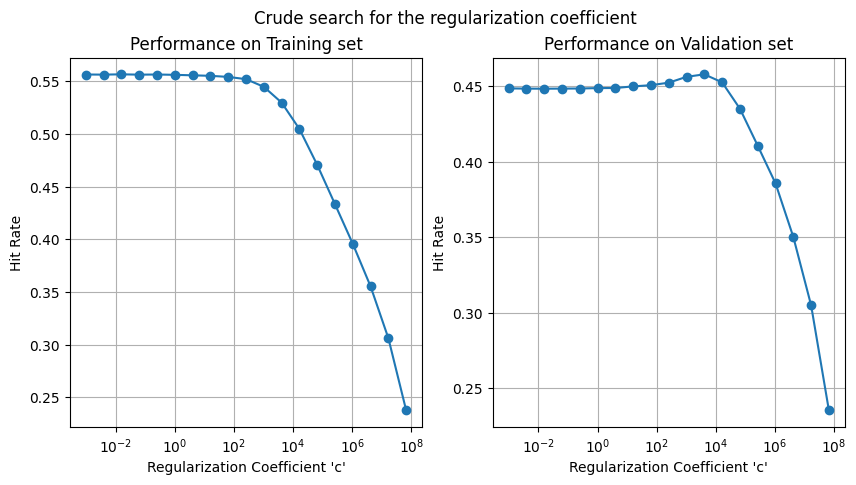

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))


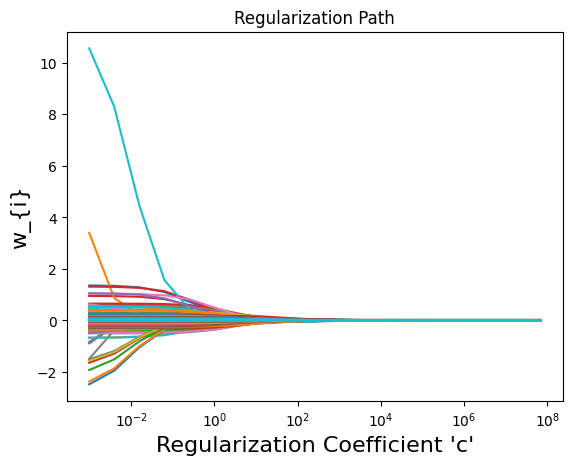

In [ ]:
#Mostra como os valores dos coeficientes (pesos) mudam com diferentes valores
# de coeficiente de regularização c.
lambd_values = c_values
w_values = Ws

def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"Regularization Coefficient 'c'", fontsize=16)
    plt.ylabel(r"w_{i}", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, w_values)

In [ ]:
#Gera uma faixa de valores de coeficiente de regularização em torno do melhor
#valor de c e calcula as taxas de acerto.
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, fine_c_values)

1024.0
2560.0
4096.0
5632.0
7168.0
8704.0
10240.0
11776.0
13312.0
14848.0
16384.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, fine_c_values, Ws_fine)

1024.0
2560.0
4096.0
5632.0
7168.0
8704.0
10240.0
11776.0
13312.0
14848.0
16384.0


Best c value: 5632.0 
Performance of this value: 0.45913333333333334


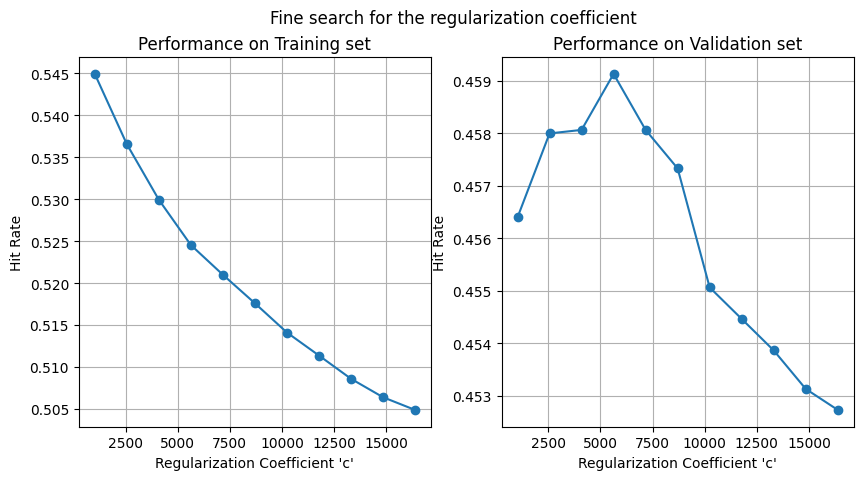

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
#Cria uma matriz de caracteristica estendida X_elm com viés, calcula os pesos
# para o modelo usando as saidas da camada oculta e a regressão linear regularizada
X_elm = np.concatenate((np.transpose(np.array([np.ones(X.shape[0])])), X), axis=1)
W_elm = get_w(get_h(X_elm, V, relu), yy, best_c)

In [ ]:
Xt_elm = np.concatenate((np.transpose(np.array([np.ones(Xt.shape[0])])), Xt), axis=1)
yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.4653
[[529  42 110  51  72  32  17  37 102  42]
 [ 47 591  37  58  38  36  38  61  77 191]
 [ 38   9 299  69 144  84  59  52  10   8]
 [ 16  23  77 238  44 155  54  52  24  22]
 [ 19  11 117  54 349  62 100  64  12   9]
 [ 11  16  73 193  54 351  56  65  26  20]
 [ 34  26 135 153 145 108 588  41  11  34]
 [ 45  40  76  73  93  94  34 525  18  58]
 [203  78  47  38  42  42  23  33 657  90]
 [ 58 164  29  73  19  36  31  70  63 526]]


Image no. 1


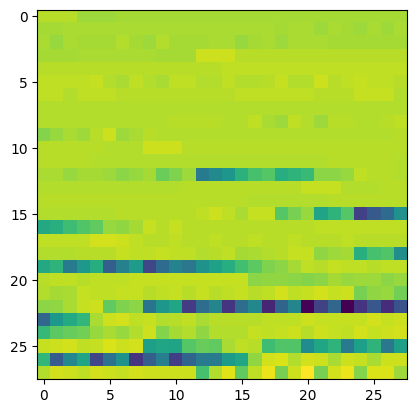

Real: 8
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.05591831  0.25743048  0.01929315 -0.01546573 -0.00449842  0.04974083
 -0.08512386 -0.15222865  0.33646637  0.45779156] 

Image no. 3


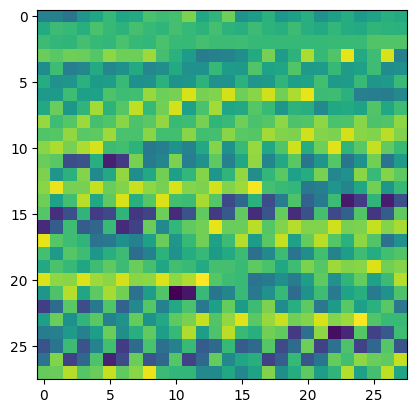

Real: 0
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.26499033  0.06138795  0.1646832   0.12572655  0.06558351  0.01774598
 -0.03382832  0.07271709  0.28790432 -0.0266231 ] 

Image no. 4


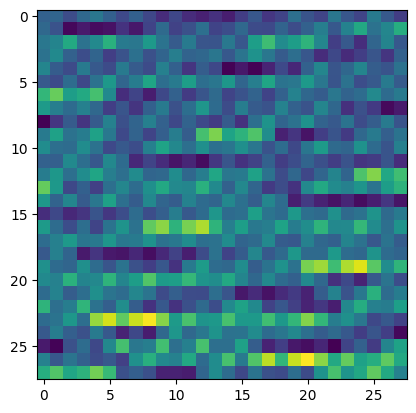

Real: 6
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.11507852  0.1103573   0.13966378  0.07170071  0.4025535   0.11754021
  0.19101274  0.10045344  0.07080882 -0.11069954] 

Image no. 6


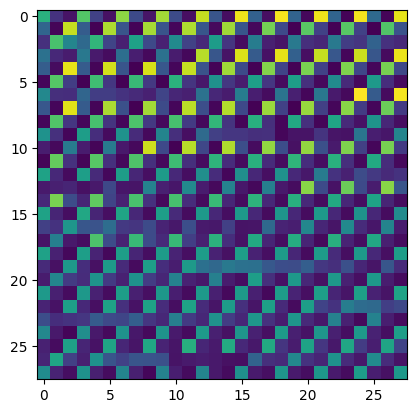

Real: 1
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.13710622  0.32200471  0.01177111  0.34199363 -0.06146285  0.26047352
  0.03282786 -0.13651047 -0.01437065  0.05497573] 

Image no. 8


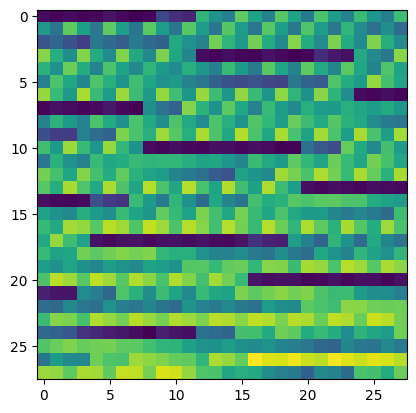

Real: 3
Predicted: 5
Rank of the correct answer: 5
Probabilities: [ 0.08434879  0.15817776  0.20664549  0.12996459  0.17080258  0.22256263
  0.04362433  0.09277164  0.01134149 -0.07081165] 

Image no. 12


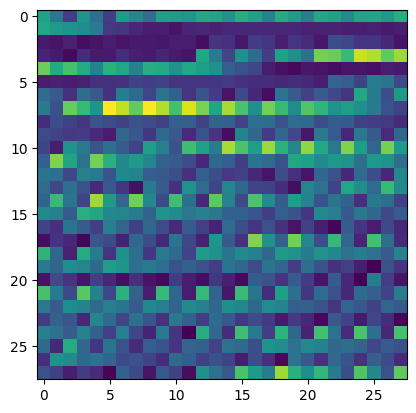

Real: 5
Predicted: 1
Rank of the correct answer: 4
Probabilities: [-0.0318322   0.27197054  0.11898489  0.07725759  0.07536603  0.11587674
  0.19735798  0.04602376  0.0462458   0.05573817] 

Image no. 14


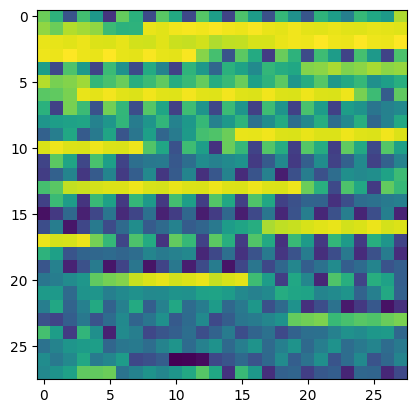

Real: 9
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.14705556  0.27835702  0.07235394  0.05952345 -0.01404004  0.17193845
  0.18308829  0.10326702  0.05461702  0.27384413] 

Image no. 17


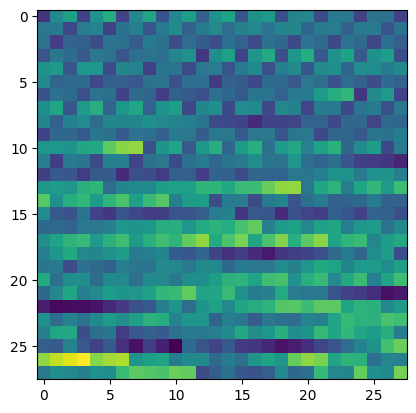

Real: 7
Predicted: 3
Rank of the correct answer: 7
Probabilities: [ 0.18647696 -0.02038194  0.06302666  0.23543281  0.13226994  0.04960934
  0.16549445  0.05009848 -0.0310978   0.23193836] 

Image no. 20


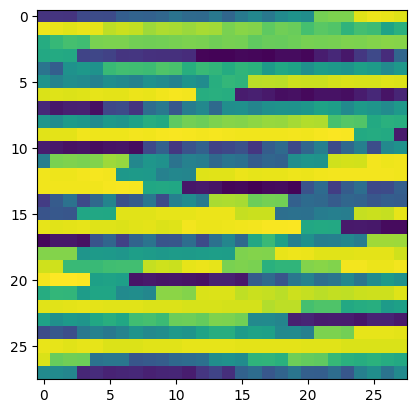

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [ 0.10716398  0.30136891 -0.00650684  0.14353952  0.10557091  0.092528
  0.05722188  0.19275228  0.06790697  0.06652245] 

Image no. 22


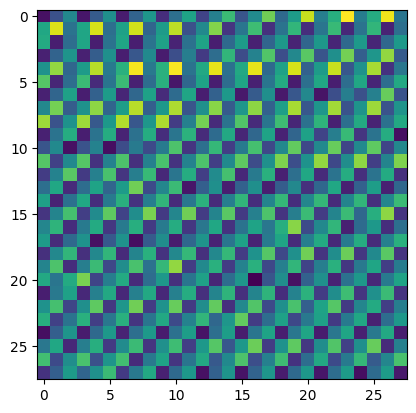

Real: 4
Predicted: 0
Rank of the correct answer: 4
Probabilities: [ 0.46277633  0.02465084  0.22903457 -0.00468727  0.11577028 -0.03562423
  0.12394854 -0.01509994  0.04539475 -0.03098297] 

Image no. 24


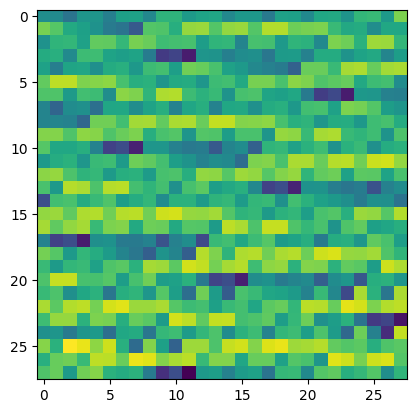

Real: 5
Predicted: 4
Rank of the correct answer: 5
Probabilities: [ 0.11663583 -0.00201919  0.25739516  0.08052367  0.37102145  0.10374172
  0.03550396  0.22978077 -0.03166328 -0.0479555 ] 

Image no. 25


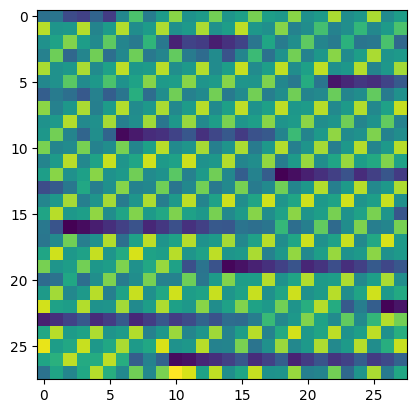

Real: 2
Predicted: 6
Rank of the correct answer: 3
Probabilities: [-0.07572407  0.10006015  0.22915197  0.01858318  0.14763502  0.08705061
  0.43114962  0.04218446  0.25137684 -0.18215784] 

Image no. 26


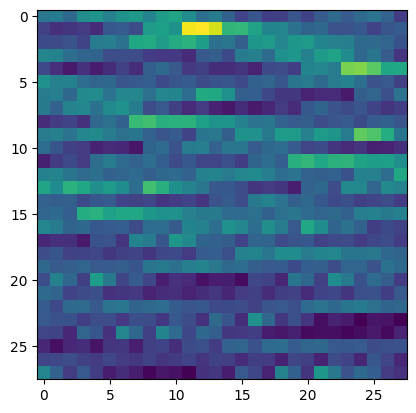

Real: 4
Predicted: 3
Rank of the correct answer: 4
Probabilities: [-0.02402669  0.02076874  0.10987118  0.1930106   0.13996264  0.17309869
  0.17285269  0.07543269 -0.05957785  0.07545239] 

Image no. 27


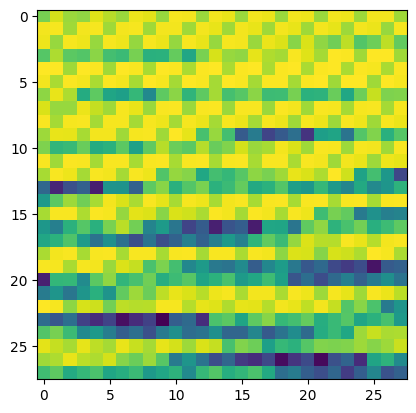

Real: 0
Predicted: 7
Rank of the correct answer: 2
Probabilities: [ 0.24192643 -0.0383084   0.14707463  0.00240624  0.11564083  0.0250722
  0.05583468  0.29210166 -0.01710262  0.14334493] 

Image no. 31


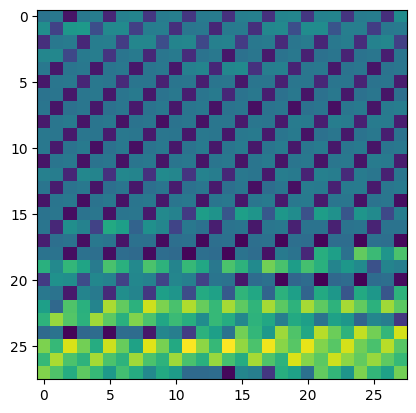

Real: 5
Predicted: 4
Rank of the correct answer: 3
Probabilities: [ 0.10682569 -0.05360392  0.20833283  0.05510654  0.22116285  0.18541737
  0.0886997   0.08592007  0.02617373  0.02743286] 

Image no. 32


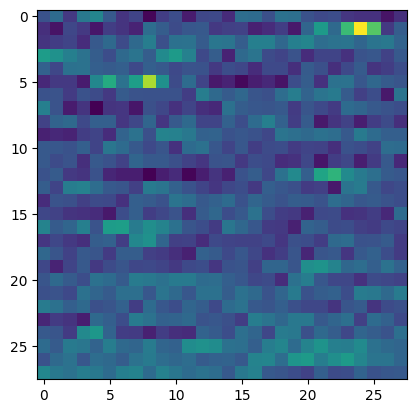

Real: 4
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.10699569 -0.02591165  0.21353491  0.10220759  0.15215889  0.07315357
  0.1670397   0.12726551  0.09216973 -0.06579519] 

Image no. 33


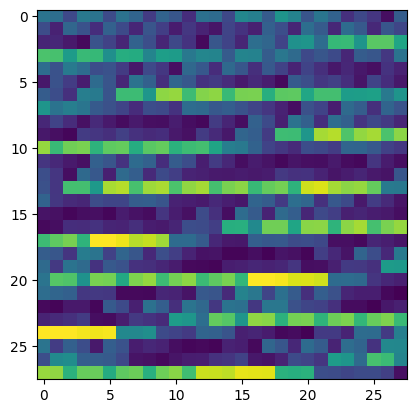

Real: 5
Predicted: 6
Rank of the correct answer: 3
Probabilities: [-0.03504689 -0.06500524  0.1420799   0.24722879 -0.01520977  0.22713115
  0.3063037  -0.04876387  0.10381709 -0.0668368 ] 

Image no. 35


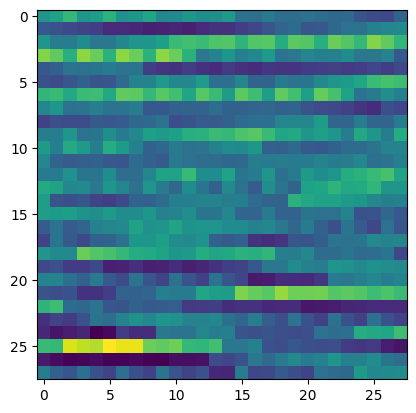

Real: 2
Predicted: 1
Rank of the correct answer: 5
Probabilities: [-0.05660145  0.45085617  0.08036845 -0.00980501  0.00209432  0.058464
  0.131103    0.06922069  0.10298935  0.15982374] 

Image no. 36


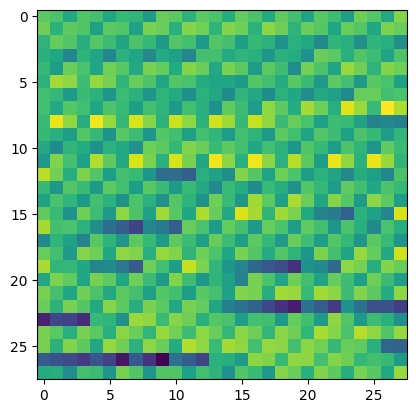

Real: 4
Predicted: 2
Rank of the correct answer: 3
Probabilities: [-0.04060268  0.06624228  0.24290006  0.05666628  0.20825385  0.06670267
  0.23864708  0.07483967  0.02280392  0.08845762] 

Image no. 37


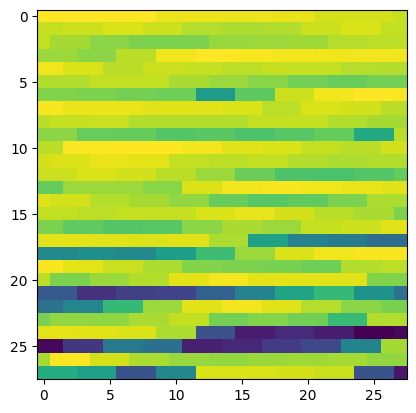

Real: 1
Predicted: 9
Rank of the correct answer: 4
Probabilities: [ 0.18431777  0.16829396  0.05503994  0.07772078  0.00365629 -0.01057127
 -0.07836309 -0.02937116  0.22732974  0.54401953] 

Image no. 38


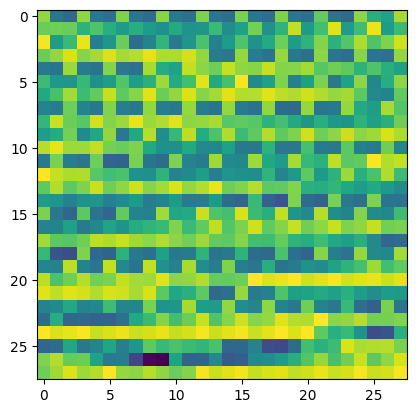

Real: 9
Predicted: 1
Rank of the correct answer: 2
Probabilities: [ 0.0556919   0.40308721 -0.12634752  0.07970707  0.06162919  0.04302788
  0.11578883  0.06688344  0.02663271  0.2080442 ] 

Image no. 40


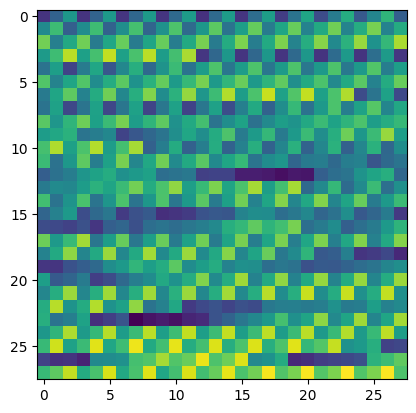

Real: 4
Predicted: 0
Rank of the correct answer: 5
Probabilities: [ 0.21679952  0.19713028  0.10968511 -0.08345299  0.15567436  0.06359621
 -0.00417636  0.20145061  0.15908793  0.07506643] 

Image no. 42


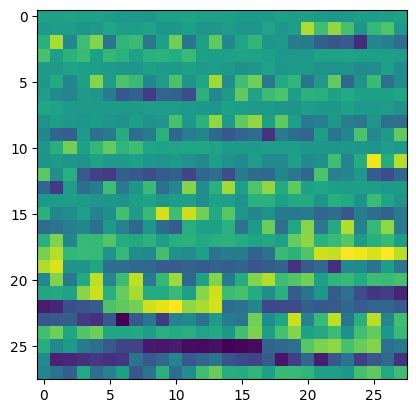

Real: 5
Predicted: 9
Rank of the correct answer: 4
Probabilities: [ 0.05877198  0.05809347 -0.06066792  0.1994249  -0.0528503   0.08564133
 -0.00587121  0.14314927 -0.00177674  0.38619848] 

Image no. 43


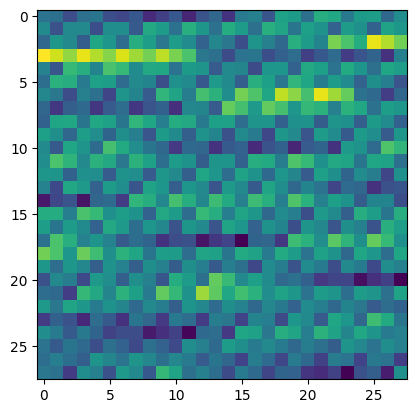

Real: 6
Predicted: 1
Rank of the correct answer: 4
Probabilities: [-0.00588042  0.19877282  0.09822671  0.13704307  0.15196953  0.14526536
  0.14344865  0.01767286 -0.01248944  0.01679188] 

Image no. 44


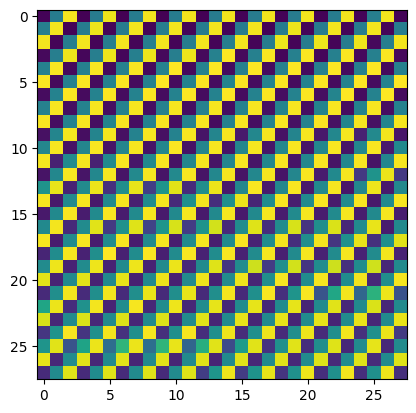

Real: 0
Predicted: 7
Rank of the correct answer: 3
Probabilities: [ 0.29607051  0.00260769  0.13572479 -0.04821472 -0.0239908  -0.08807036
 -0.16037883  0.37066805  0.31425952  0.21346922] 

Image no. 46


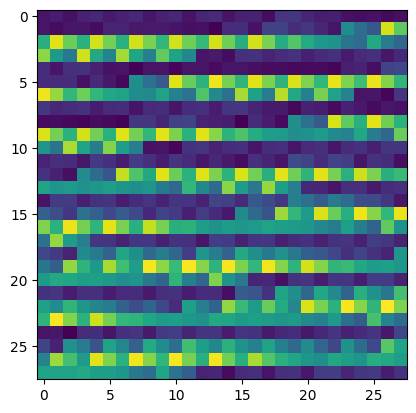

Real: 3
Predicted: 5
Rank of the correct answer: 2
Probabilities: [-0.1320213   0.07014942  0.13138868  0.30155638  0.08022413  0.31588986
  0.22183601 -0.03880223  0.00123161  0.09496631] 

Image no. 47


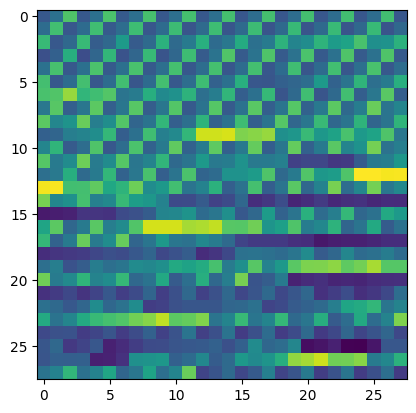

Real: 9
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.20427509 -0.05881609 -0.04204321  0.11073946  0.07853926 -0.0418739
  0.16404392  0.04935017  0.2745117   0.22302966] 

Image no. 48


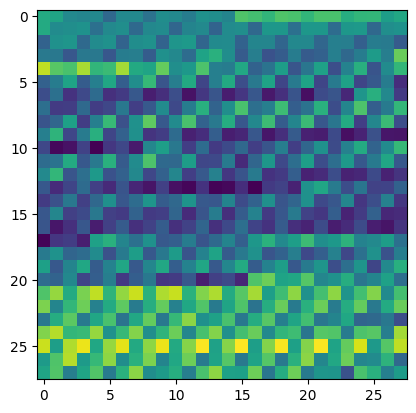

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.01221629 -0.01923578  0.19162675 -0.04094209  0.38099433  0.01509636
  0.14888726  0.22859495 -0.02535351  0.06463839] 

Image no. 52


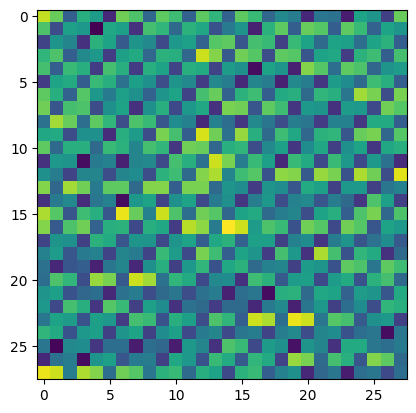

Real: 0
Predicted: 6
Rank of the correct answer: 6
Probabilities: [0.0723817  0.14711643 0.06090546 0.10248029 0.06703429 0.0481183
 0.17359771 0.08335782 0.15801468 0.03003218] 

Image no. 53


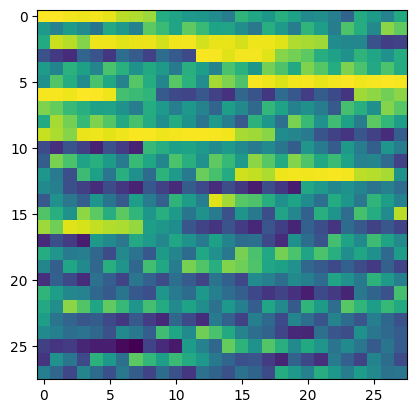

Real: 3
Predicted: 7
Rank of the correct answer: 3
Probabilities: [-0.03897882  0.11335495  0.01484269  0.17107042 -0.00495501  0.12651417
  0.04169674  0.19243159  0.04060759  0.18509788] 

Image no. 56


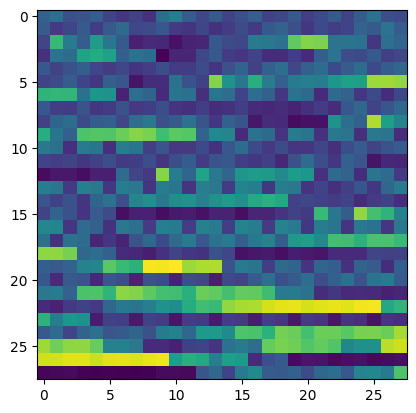

Real: 7
Predicted: 5
Rank of the correct answer: 2
Probabilities: [ 0.00844655 -0.02698807  0.1930725   0.14476665  0.17532702  0.27824651
  0.11589083  0.26268591 -0.03088957  0.0822008 ] 

Image no. 57


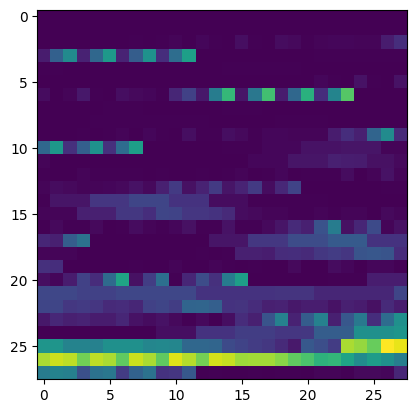

Real: 7
Predicted: 6
Rank of the correct answer: 7
Probabilities: [ 0.12707414  0.18713462 -0.05501731  0.04139895  0.06165028 -0.01243184
  0.28712623  0.02634321  0.28617269  0.02606941] 

Image no. 58


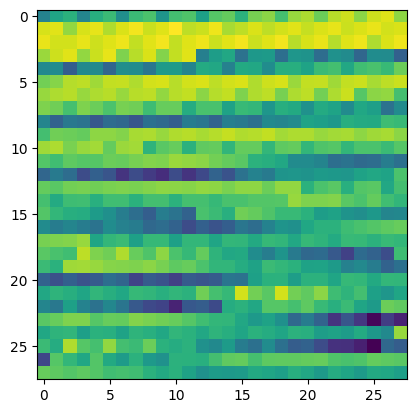

Real: 4
Predicted: 8
Rank of the correct answer: 8
Probabilities: [-0.01816861  0.0066566   0.10718783  0.14494715  0.0594993   0.09242215
  0.11991966  0.07909209  0.25156428  0.11957716] 

Image no. 59


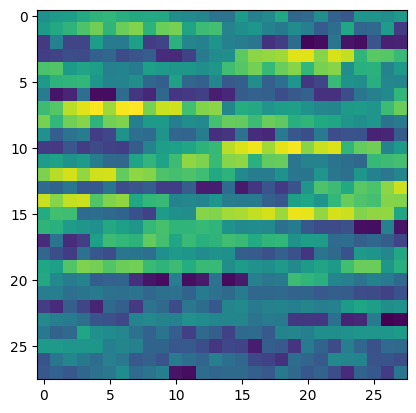

Real: 6
Predicted: 4
Rank of the correct answer: 3
Probabilities: [ 0.08893309  0.06388915  0.21558847  0.13029577  0.27512095  0.05530851
  0.18357367 -0.07854306  0.04143646  0.08045514] 

Image no. 63


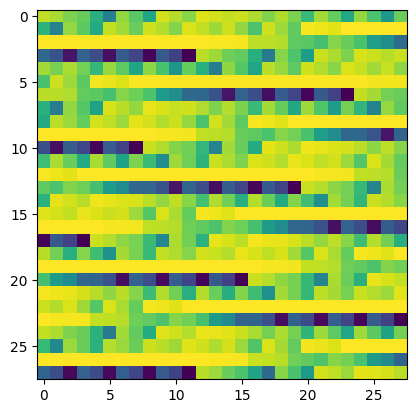

Real: 3
Predicted: 9
Rank of the correct answer: 8
Probabilities: [-0.00498749  0.13838304  0.08810936  0.03949026  0.08830303  0.12628618
  0.05796264  0.0120631   0.12111132  0.47635565] 

Image no. 67


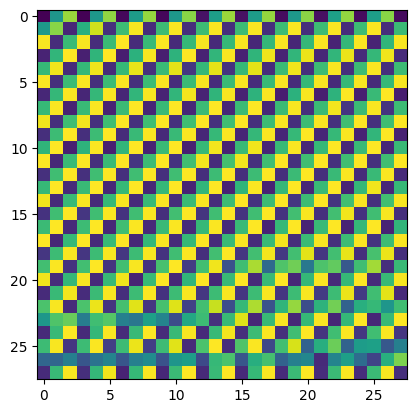

Real: 2
Predicted: 8
Rank of the correct answer: 4
Probabilities: [ 0.34005882 -0.10201216  0.21371919 -0.00669074  0.08776951  0.0558643
  0.29590487  0.01944749  0.54931587 -0.22169781] 

Image no. 68


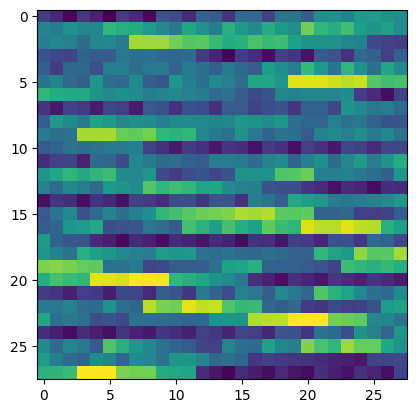

Real: 3
Predicted: 5
Rank of the correct answer: 2
Probabilities: [-0.07154366  0.12853609  0.05008634  0.25141944  0.00038129  0.25735669
 -0.06784885  0.04343297  0.04140666  0.20512786] 

Image no. 69


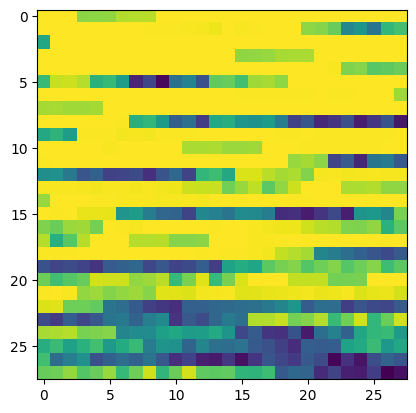

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.14549628  0.20380397  0.08623241 -0.09298742  0.07815514 -0.03566141
 -0.03456492  0.26726185  0.05332661  0.40284718] 

Image no. 71


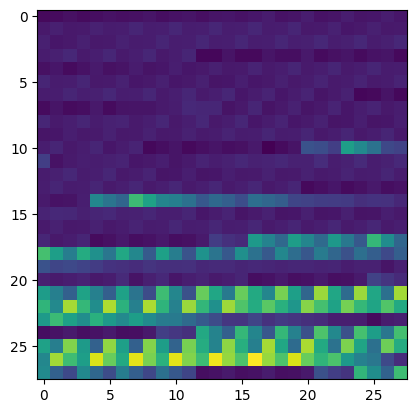

Real: 6
Predicted: 7
Rank of the correct answer: 3
Probabilities: [ 0.02995362  0.06805953  0.0885139   0.11710242  0.13885952  0.09504886
  0.12918261  0.21426616 -0.01914198  0.04466301] 

Image no. 75


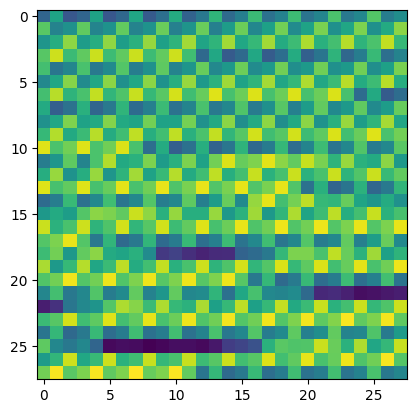

Real: 2
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.05993292  0.02710545  0.35331236  0.07700274  0.37831873 -0.03159736
  0.19975966  0.09920598 -0.0072466  -0.00461387] 

Image no. 77


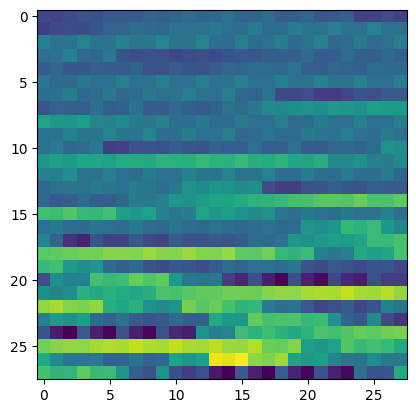

Real: 3
Predicted: 5
Rank of the correct answer: 2
Probabilities: [-0.00229303  0.08534811  0.05444443  0.27292684 -0.0406066   0.30024082
  0.03322458  0.02877656  0.20054617  0.03971826] 

Image no. 78


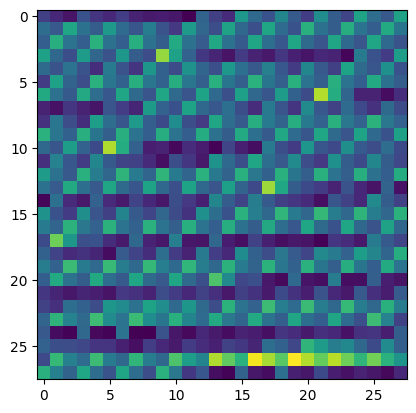

Real: 3
Predicted: 6
Rank of the correct answer: 3
Probabilities: [ 0.08621359  0.20180001  0.12489877  0.17872701 -0.0104727   0.08094484
  0.24797629  0.01873383 -0.07157288  0.10717531] 

Image no. 83


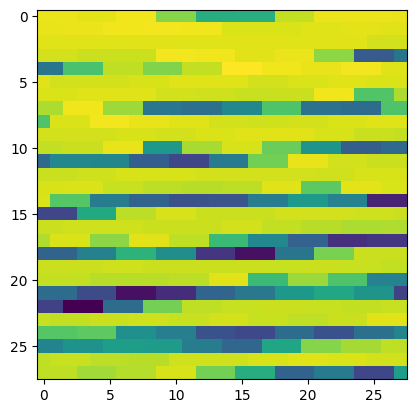

Real: 7
Predicted: 2
Rank of the correct answer: 7
Probabilities: [ 0.20883754 -0.03107733  0.24590128  0.21441011  0.00746167  0.12718656
 -0.04443429  0.05063371  0.11858415  0.14045798] 

Image no. 84


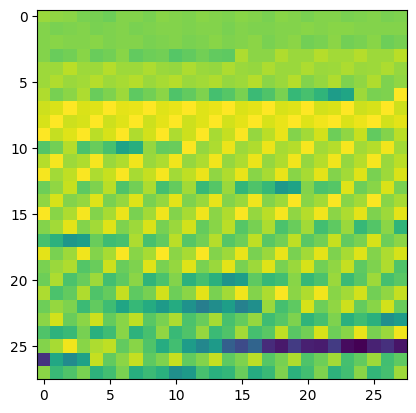

Real: 2
Predicted: 0
Rank of the correct answer: 2
Probabilities: [ 0.33795085 -0.03593308  0.30426334  0.17224984  0.02796555  0.13230178
 -0.06839116  0.02930619  0.14806674  0.02102296] 

Image no. 85


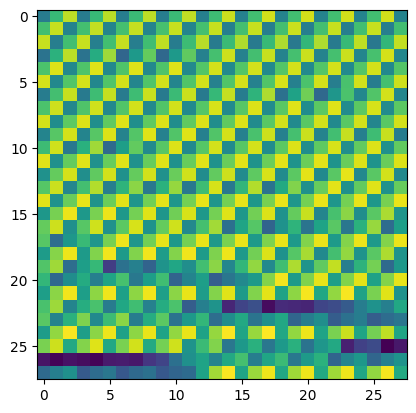

Real: 5
Predicted: 9
Rank of the correct answer: 10
Probabilities: [ 0.10751597  0.00743799  0.14735785  0.00692163 -0.04296774 -0.08899798
  0.05231171  0.3223251   0.04967281  0.43206629] 

Image no. 86


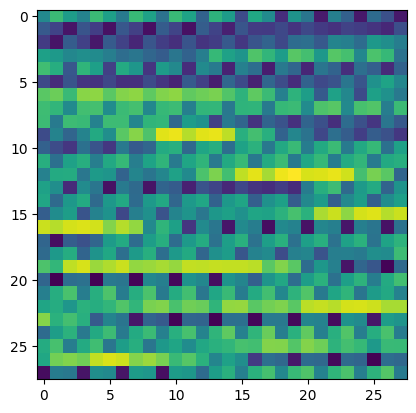

Real: 2
Predicted: 3
Rank of the correct answer: 5
Probabilities: [0.16801475 0.07065049 0.08787619 0.20975544 0.13975232 0.01073194
 0.08690942 0.06124861 0.12974463 0.00923164] 

Image no. 87


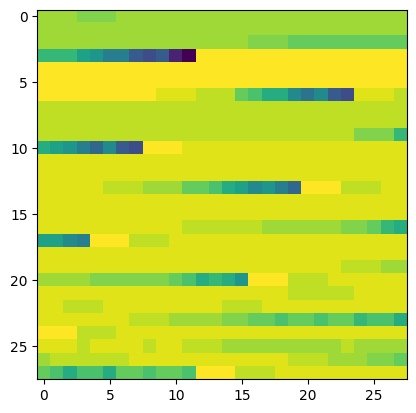

Real: 7
Predicted: 8
Rank of the correct answer: 9
Probabilities: [ 0.20289864  0.10193234  0.07950512  0.03003711  0.06050313  0.09091268
 -0.05516472  0.02632504  0.42348388  0.09375942] 

Image no. 89


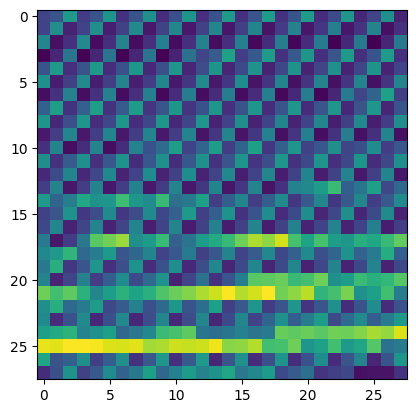

Real: 9
Predicted: 0
Rank of the correct answer: 3
Probabilities: [ 0.2791945   0.14474914 -0.02352771  0.0049321   0.08546593  0.0104782
 -0.01362786  0.07449255  0.23293651  0.18711285] 

Image no. 91


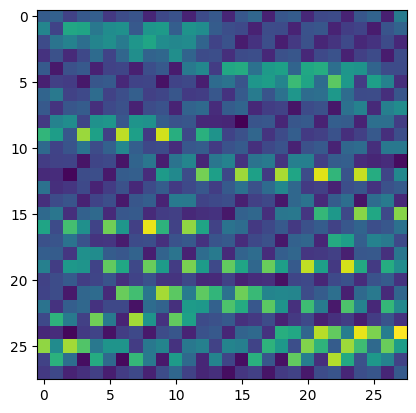

Real: 3
Predicted: 6
Rank of the correct answer: 5
Probabilities: [-0.02953523 -0.0700006   0.21518842  0.17580278  0.24863672  0.20566984
  0.27639569 -0.03209443 -0.03117712  0.03732141] 

Image no. 95


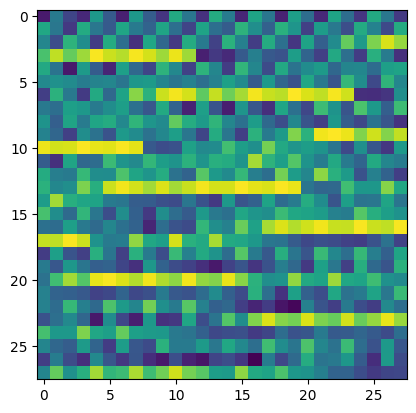

Real: 6
Predicted: 9
Rank of the correct answer: 2
Probabilities: [-0.00500606 -0.00813641  0.17074756  0.1017399   0.13229428  0.11296725
  0.17675437  0.07952436  0.0085089   0.27851722] 

Image no. 98


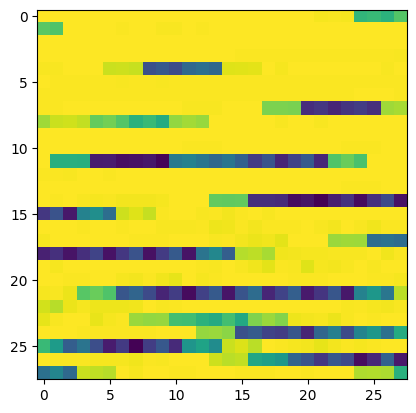

Real: 0
Predicted: 2
Rank of the correct answer: 3
Probabilities: [0.15893215 0.04991923 0.2865259  0.15234647 0.05964942 0.14147069
 0.03393577 0.2787283  0.05004466 0.03479681] 

Image no. 100


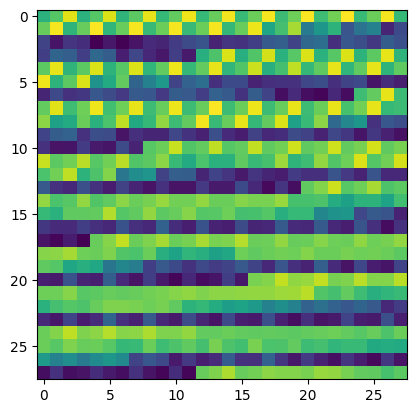

Real: 4
Predicted: 7
Rank of the correct answer: 3
Probabilities: [ 0.10475089 -0.01170064  0.12040438  0.13589875  0.13714658  0.16144799
  0.03330964  0.20815526  0.04861647  0.01072578] 

Image no. 101


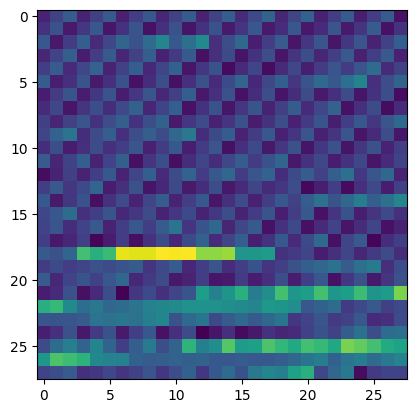

Real: 5
Predicted: 4
Rank of the correct answer: 3
Probabilities: [0.06783543 0.10666463 0.04718592 0.09228649 0.25690064 0.12098589
 0.00625258 0.16852922 0.095595   0.06286642] 

Image no. 106


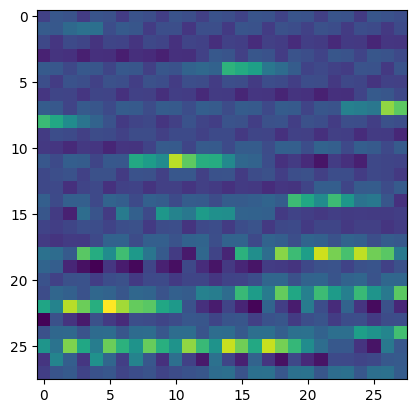

Real: 3
Predicted: 5
Rank of the correct answer: 4
Probabilities: [0.06365361 0.06023679 0.06499927 0.08948815 0.02243698 0.21978096
 0.15192636 0.01889744 0.1276104  0.04014845] 

Image no. 109


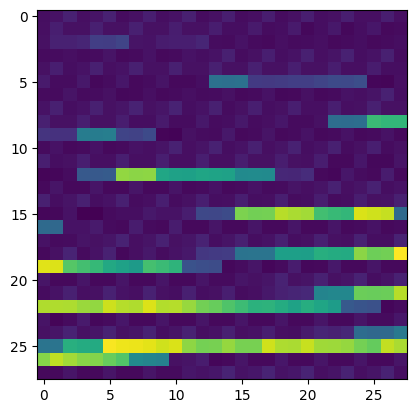

Real: 7
Predicted: 5
Rank of the correct answer: 2
Probabilities: [ 0.05431908  0.03077693 -0.14149362  0.16439069  0.00281182  0.43767084
  0.1377845   0.34059705  0.13750205  0.08748952] 

Image no. 110


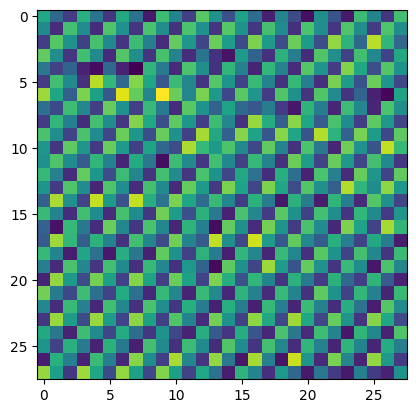

Real: 4
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.10949934  0.09720197  0.01058487  0.07170985  0.22936503  0.05813385
  0.47304469  0.03919971 -0.05943545  0.02842937] 

Image no. 111


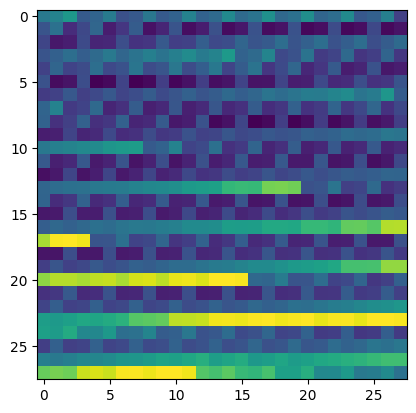

Real: 0
Predicted: 2
Rank of the correct answer: 4
Probabilities: [ 0.21175814  0.06218602  0.38011208  0.2747807   0.1341224   0.33850195
 -0.06930499  0.00920485 -0.1433511  -0.05673042] 

Image no. 114


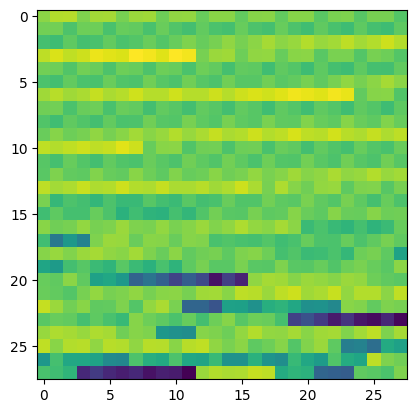

Real: 1
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.10176351  0.22312284 -0.06559335 -0.00829034  0.02894574 -0.03151422
  0.0969152   0.13628064  0.1123839   0.44633565] 

Image no. 117


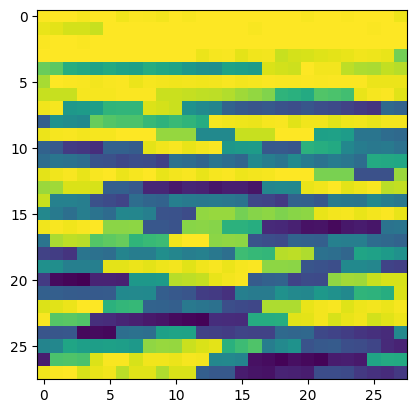

Real: 4
Predicted: 9
Rank of the correct answer: 9
Probabilities: [ 0.04265964  0.06131841  0.12914993  0.06852351 -0.01302947  0.05551466
 -0.02300532  0.21676973  0.1015135   0.2807094 ] 

Image no. 119


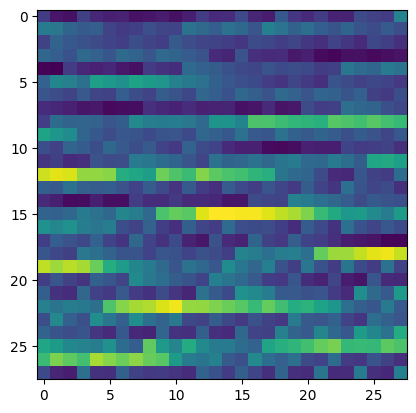

Real: 7
Predicted: 5
Rank of the correct answer: 4
Probabilities: [ 0.05775116  0.02312797 -0.0212548   0.13216011  0.06630244  0.2824773
  0.1768637   0.13617485 -0.11180037  0.16959222] 

Image no. 121


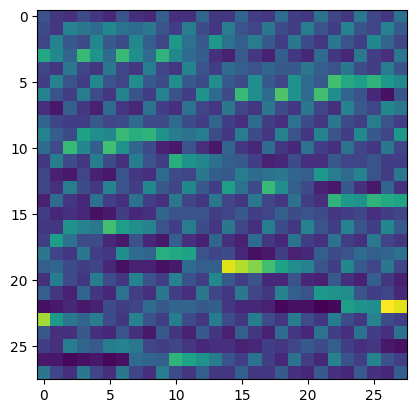

Real: 3
Predicted: 4
Rank of the correct answer: 5
Probabilities: [-0.0460765   0.07779181  0.00163823  0.07991544  0.34823868  0.11567779
  0.0721062   0.23263846  0.10616756 -0.06412457] 

Image no. 124


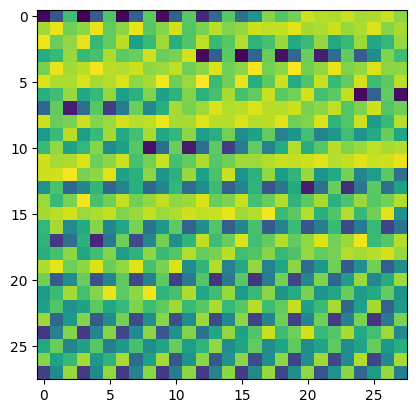

Real: 8
Predicted: 0
Rank of the correct answer: 2
Probabilities: [ 0.36876554  0.05250431  0.03554265  0.03167877  0.06227883  0.02610218
 -0.03286097  0.07419521  0.22701541  0.10730527] 

Image no. 125


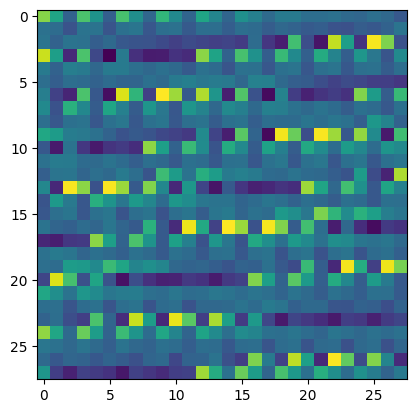

Real: 0
Predicted: 3
Rank of the correct answer: 8
Probabilities: [ 0.04608513  0.15833101  0.14549396  0.18963198  0.07796347 -0.05378122
  0.15703191  0.0572681   0.09688791  0.03315403] 

Image no. 127


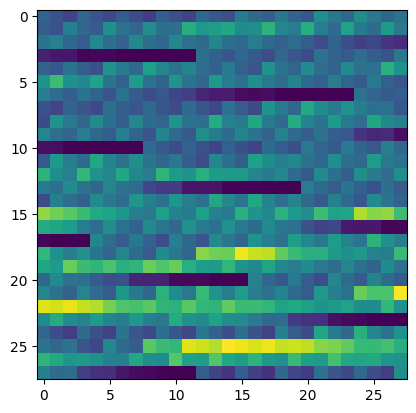

Real: 3
Predicted: 5
Rank of the correct answer: 2
Probabilities: [ 3.83965532e-03  1.80661072e-01  7.54429705e-02  2.95945490e-01
 -4.91276672e-02  3.72905904e-01 -2.26558048e-04  5.58629163e-02
 -2.10303945e-02  6.35463480e-02] 

Image no. 128


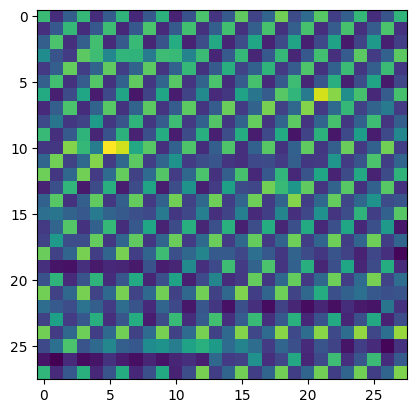

Real: 5
Predicted: 3
Rank of the correct answer: 3
Probabilities: [ 0.02402373  0.15338622 -0.01285379  0.33222549  0.31842345  0.20499709
 -0.08050113  0.02556126 -0.00181369  0.03035641] 

Image no. 129


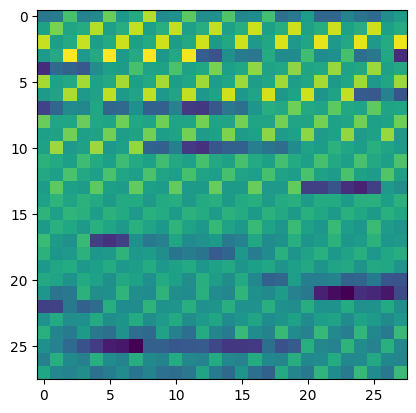

Real: 2
Predicted: 6
Rank of the correct answer: 8
Probabilities: [ 0.19681125  0.05044528  0.06737988 -0.00365988  0.08151675  0.08216742
  0.2162022   0.10587239  0.09079958  0.12711068] 

Image no. 132


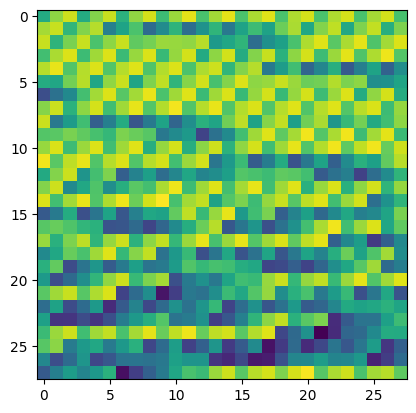

Real: 8
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.15172823  0.15209659  0.05208244  0.02228892  0.096031   -0.03964209
  0.06076656 -0.05898843  0.27064639  0.35882186] 

Image no. 133


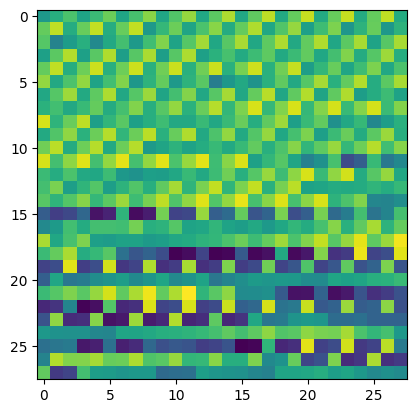

Real: 9
Predicted: 7
Rank of the correct answer: 2
Probabilities: [ 0.07478455  0.33349095 -0.21546173  0.14040253 -0.15808893  0.16757855
 -0.13376435  0.4347385  -0.10883642  0.35578279] 

Image no. 138


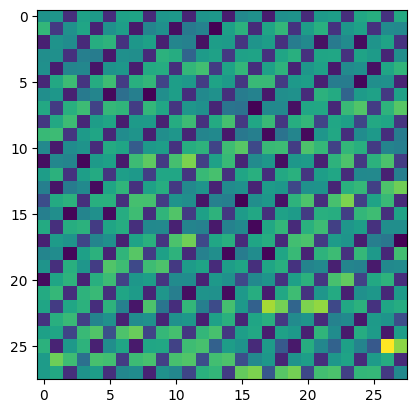

Real: 2
Predicted: 6
Rank of the correct answer: 2
Probabilities: [-0.04913704 -0.04367462  0.34029419  0.05844118  0.25853045  0.03910014
  0.42992176  0.05118752 -0.11750611 -0.01847938] 

Image no. 139


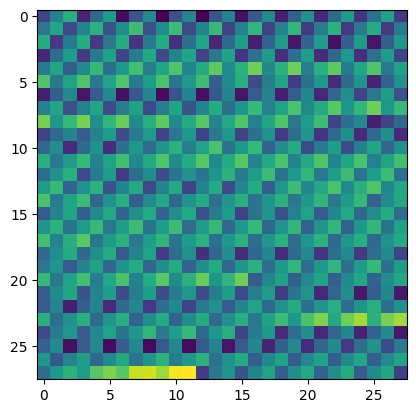

Real: 9
Predicted: 8
Rank of the correct answer: 9
Probabilities: [ 0.08531087  0.18897064  0.05598955  0.07526141  0.08151152 -0.02534172
  0.05825934  0.089669    0.41081845  0.01400728] 

Image no. 140


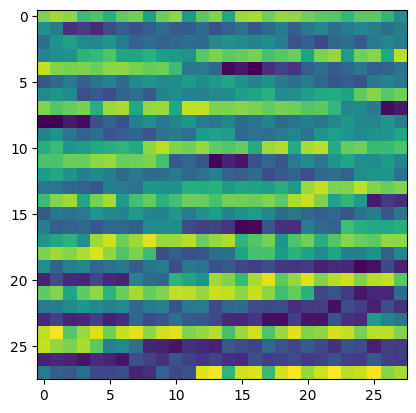

Real: 6
Predicted: 2
Rank of the correct answer: 3
Probabilities: [0.08090619 0.03262688 0.21331223 0.08392891 0.20623155 0.0989059
 0.1058954  0.04203166 0.0554337  0.056846  ] 

Image no. 141


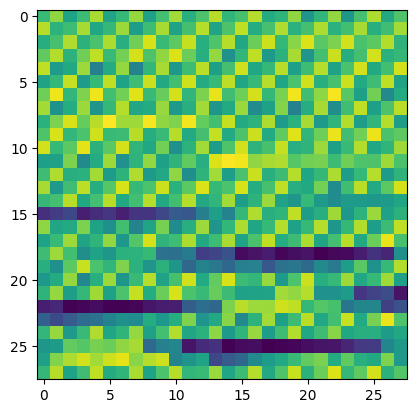

Real: 5
Predicted: 8
Rank of the correct answer: 4
Probabilities: [-0.01286401  0.16997022  0.15930581  0.1300757   0.03134278  0.1418487
  0.0871965   0.08841547  0.25759044  0.00810591] 

Image no. 142


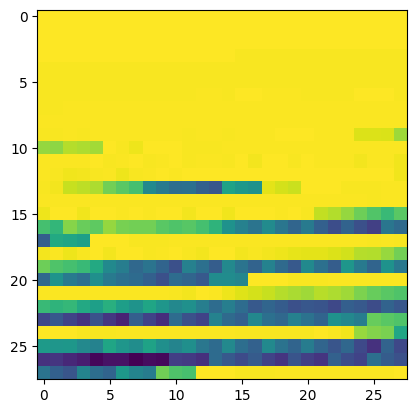

Real: 6
Predicted: 1
Rank of the correct answer: 2
Probabilities: [ 0.18034715  0.30241108  0.04309114  0.1404829   0.01416106  0.00632268
  0.19611468 -0.00850703  0.05649147  0.06750064] 

Image no. 143


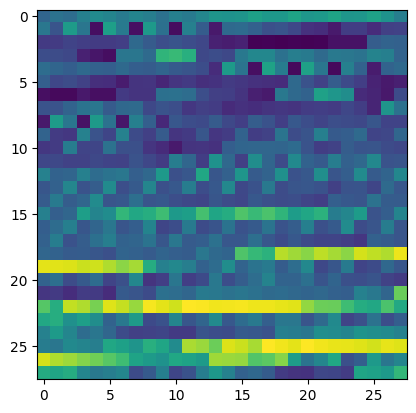

Real: 3
Predicted: 5
Rank of the correct answer: 4
Probabilities: [0.04631492 0.17548217 0.11233642 0.10771788 0.04903827 0.24499611
 0.03610683 0.02853027 0.10272178 0.06393901] 

Image no. 145


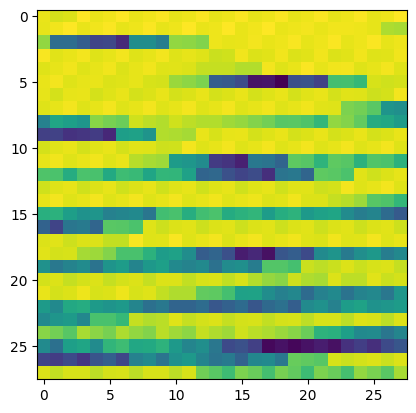

Real: 7
Predicted: 3
Rank of the correct answer: 2
Probabilities: [0.13455752 0.01714227 0.150188   0.19275744 0.14453409 0.07521846
 0.02092098 0.18303666 0.06604574 0.110707  ] 

Image no. 147


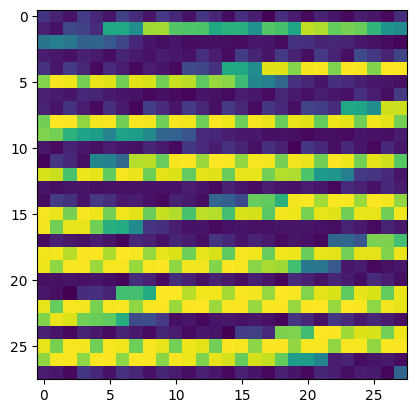

Real: 2
Predicted: 5
Rank of the correct answer: 5
Probabilities: [ 0.00493099 -0.10316486  0.13609483  0.22113422 -0.02779423  0.55902538
  0.28746735  0.10093954 -0.18130376  0.21794814] 

Image no. 148


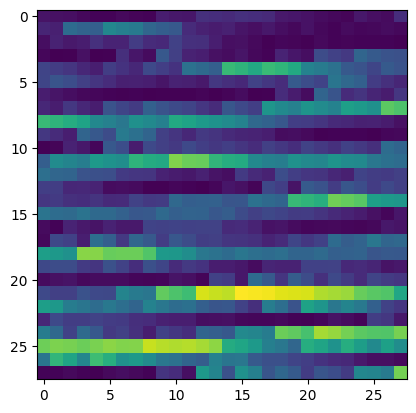

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.10579271 -0.04525948  0.01727036  0.41423929  0.135824    0.31503877
  0.08578713  0.1160799  -0.05526088  0.0482422 ] 

Image no. 149


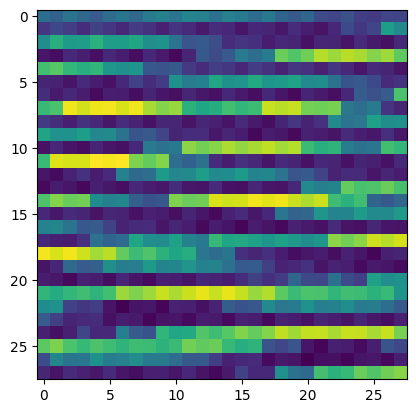

Real: 2
Predicted: 5
Rank of the correct answer: 9
Probabilities: [ 0.00572622  0.16935519 -0.01871643  0.17616724 -0.11108812  0.32846127
  0.04348959  0.11652829  0.0332004   0.31855574] 

Image no. 150


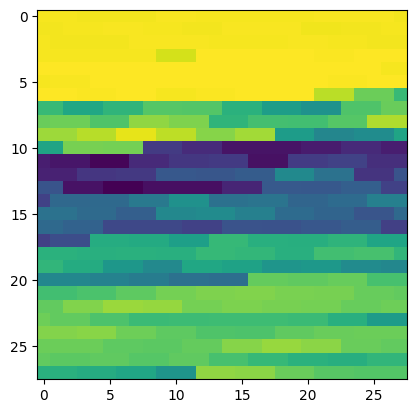

Real: 8
Predicted: 1
Rank of the correct answer: 2
Probabilities: [0.07190431 0.21634757 0.08789409 0.10997862 0.04580457 0.02233629
 0.06021157 0.07526193 0.11950593 0.10363092] 

Image no. 151


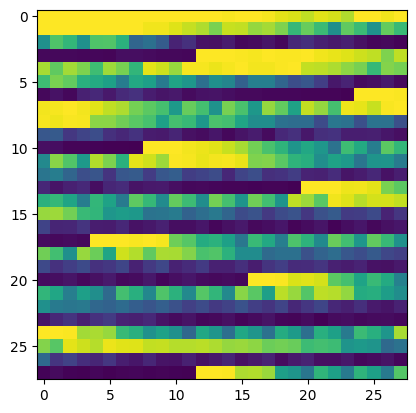

Real: 9
Predicted: 1
Rank of the correct answer: 4
Probabilities: [-0.00491762  0.27729166  0.04191128  0.25308125 -0.01931494  0.23855492
 -0.10541693  0.13079726  0.04871416  0.19645907] 

Image no. 153


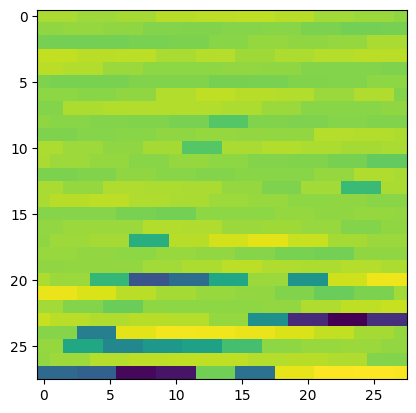

Real: 0
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.23074314  0.11616527 -0.00532365  0.21207337  0.07217108  0.02908162
  0.01293459  0.04217632  0.25254225  0.08927071] 

Image no. 158


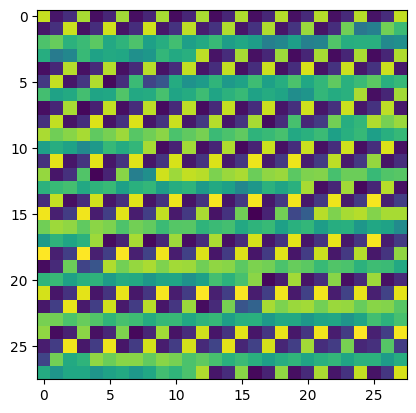

Real: 5
Predicted: 3
Rank of the correct answer: 3
Probabilities: [-0.10924639  0.07545534 -0.01879463  0.37901026  0.07640935  0.22755024
  0.27645508  0.05184203 -0.00676309 -0.02617678] 

Image no. 159


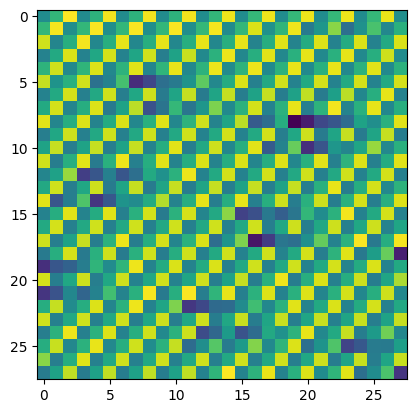

Real: 4
Predicted: 0
Rank of the correct answer: 2
Probabilities: [ 0.29013227  0.04496158  0.12707494 -0.00252874  0.18914422 -0.07092726
 -0.02111189  0.14181905  0.12803841  0.16395868] 

Image no. 160


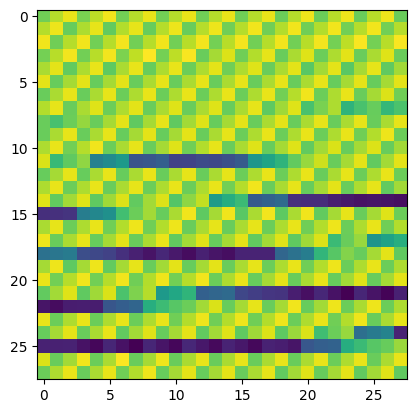

Real: 2
Predicted: 0
Rank of the correct answer: 2
Probabilities: [ 0.32742439 -0.05220707  0.31473639  0.17270568  0.06029109  0.12761725
  0.05180333  0.00118207 -0.05460268 -0.00526211] 

Image no. 162


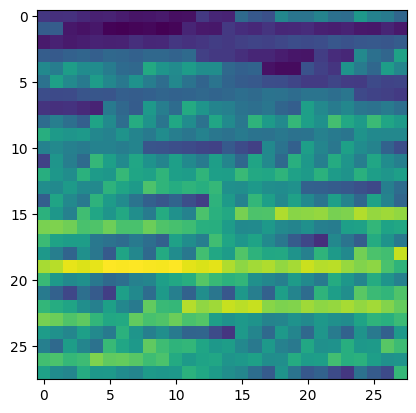

Real: 6
Predicted: 1
Rank of the correct answer: 10
Probabilities: [ 0.00695333  0.35427027  0.02289894  0.1159994  -0.00753     0.12832095
 -0.05133341  0.17007315  0.04312113  0.13714352] 

Image no. 164


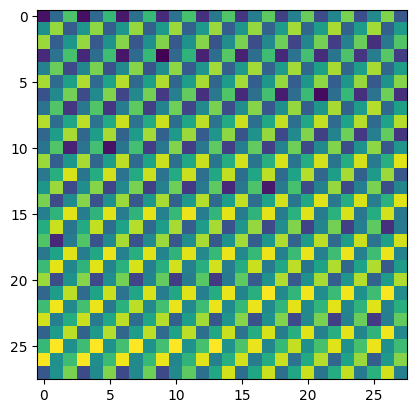

Real: 8
Predicted: 9
Rank of the correct answer: 3
Probabilities: [ 0.26206461  0.02593126 -0.02114412  0.0974243   0.05963484 -0.05408638
 -0.1046099   0.20019598  0.22037406  0.2678067 ] 

Image no. 165


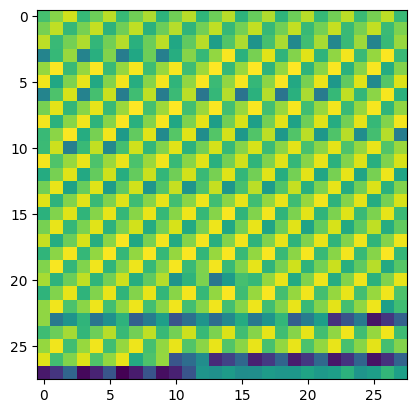

Real: 4
Predicted: 7
Rank of the correct answer: 4
Probabilities: [ 0.27882598  0.02997902  0.06329239  0.00116832  0.10747252 -0.00823748
  0.03839106  0.33184333 -0.03496283  0.24396211] 

Image no. 168


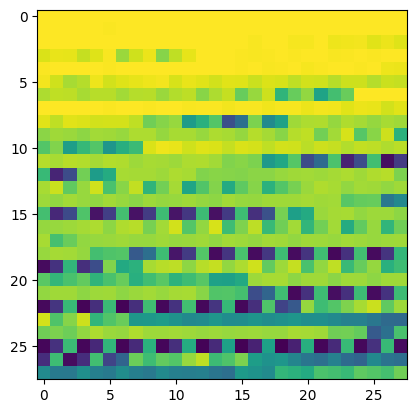

Real: 5
Predicted: 7
Rank of the correct answer: 4
Probabilities: [ 0.0419288  -0.05441733  0.03722888  0.14637588 -0.10053554  0.126119
  0.15800133  0.41785399  0.06118758  0.10261045] 

Image no. 169


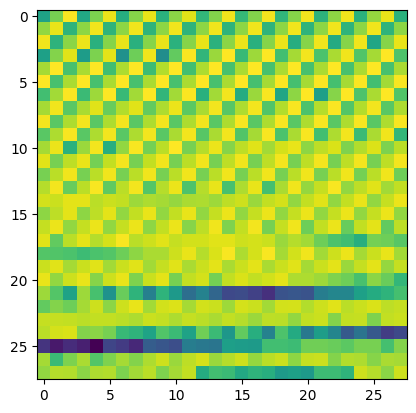

Real: 0
Predicted: 9
Rank of the correct answer: 4
Probabilities: [ 0.18575064 -0.06788502  0.1038723   0.01027652  0.09516859 -0.06418215
  0.04791362  0.25772848  0.23113086  0.26979951] 

Image no. 171


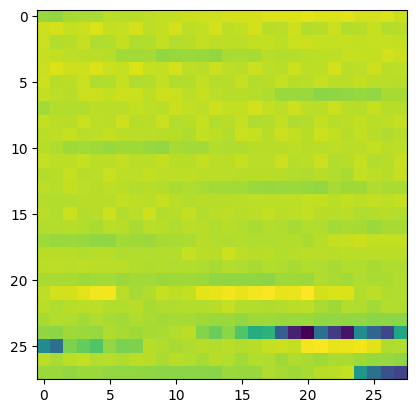

Real: 9
Predicted: 7
Rank of the correct answer: 5
Probabilities: [ 1.59766304e-01  8.09364286e-02 -1.09860111e-04  8.56321682e-02
  1.74119918e-01  3.17779134e-02  1.12976560e-01  3.78800078e-01
  6.10342127e-02  8.80666789e-02] 

Image no. 172


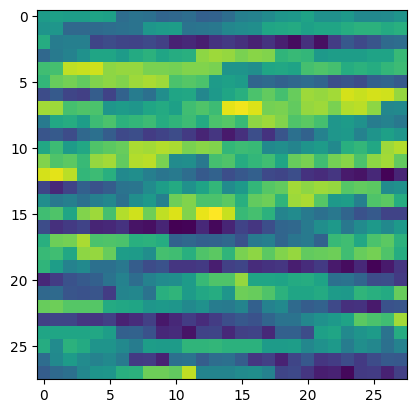

Real: 9
Predicted: 1
Rank of the correct answer: 9
Probabilities: [0.20162702 0.20695797 0.149672   0.06575102 0.06012273 0.05163674
 0.0697986  0.02205155 0.06740062 0.04353344] 

Image no. 176


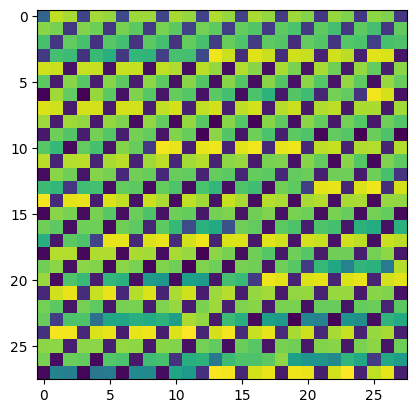

Real: 3
Predicted: 8
Rank of the correct answer: 9
Probabilities: [ 0.31234454  0.03984806  0.15338771 -0.06574078  0.14403229  0.05927791
  0.11095555 -0.07813713  0.36961031  0.00179366] 

Image no. 178


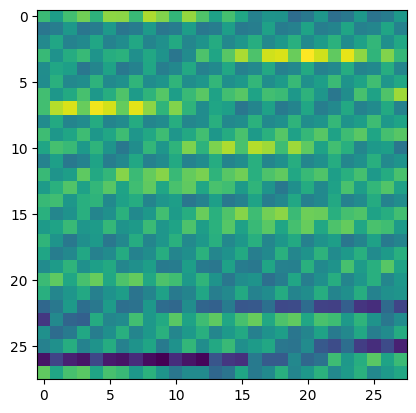

Real: 5
Predicted: 3
Rank of the correct answer: 4
Probabilities: [ 0.05922791  0.17744063  0.18487703  0.21051519  0.09073708  0.13478045
  0.06491694  0.06243259 -0.04546859 -0.0065994 ] 

Image no. 179


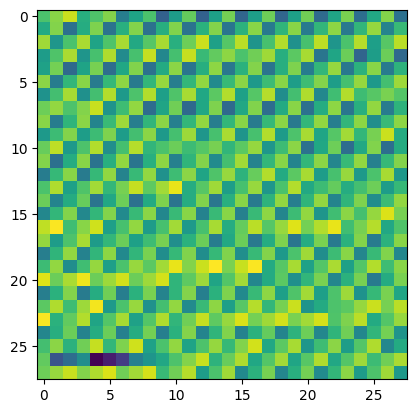

Real: 0
Predicted: 8
Rank of the correct answer: 6
Probabilities: [ 0.09443499  0.16932799  0.11724672 -0.0502646   0.00461258  0.01860799
 -0.04692041  0.21317539  0.29885857  0.21849441] 

Image no. 180


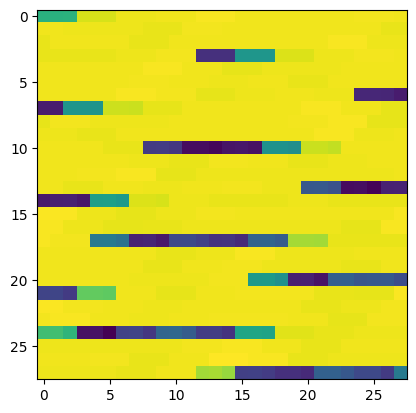

Real: 0
Predicted: 9
Rank of the correct answer: 5
Probabilities: [ 0.15354931  0.17836759  0.04158321  0.19973054  0.08872838  0.07062843
  0.05363527 -0.06862889  0.15361399  0.21330465] 

Image no. 181


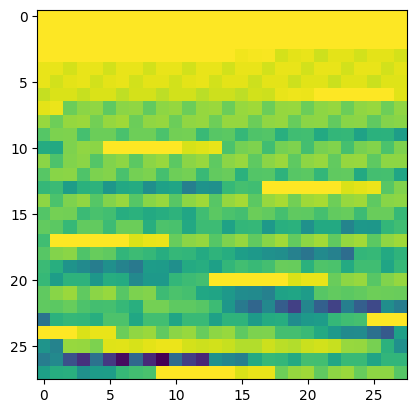

Real: 5
Predicted: 7
Rank of the correct answer: 2
Probabilities: [-0.04725237 -0.00567446  0.07824918  0.14896413  0.07531759  0.16790285
  0.01954512  0.40082357  0.04087017  0.09803377] 

Image no. 182


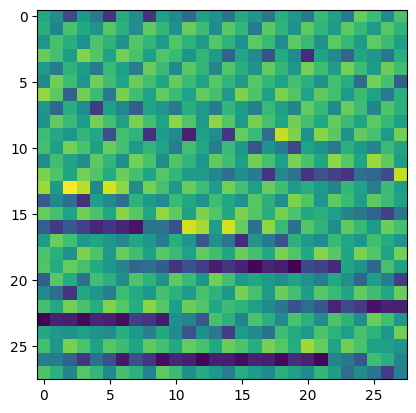

Real: 2
Predicted: 6
Rank of the correct answer: 5
Probabilities: [ 0.00732786  0.07642291  0.11473018  0.12615328  0.15755762  0.08081429
  0.40625507  0.15543024 -0.11195415  0.02710312] 

Image no. 183


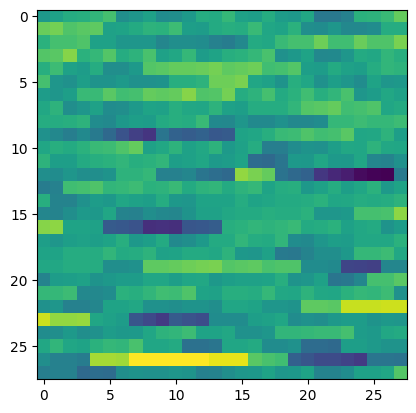

Real: 2
Predicted: 8
Rank of the correct answer: 2
Probabilities: [0.15271427 0.04978292 0.16182419 0.06193182 0.12667085 0.03568373
 0.10517187 0.01668302 0.18793889 0.03280117] 

Image no. 184


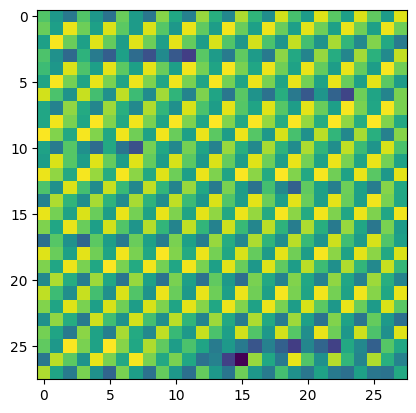

Real: 3
Predicted: 7
Rank of the correct answer: 7
Probabilities: [ 0.07972614  0.10741425  0.14167644  0.09977767  0.16637032  0.18888101
  0.1246708   0.28999595 -0.04835623 -0.09910214] 

Image no. 187


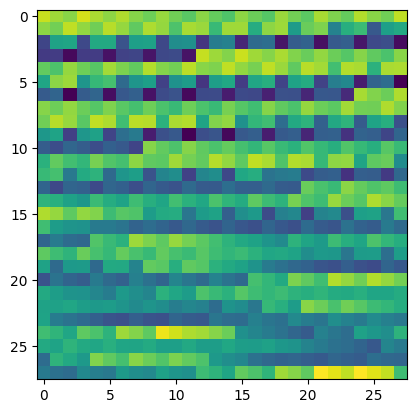

Real: 3
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.04079779  0.04530253  0.15412926  0.17204812  0.07757805  0.07756243
  0.23179931  0.0575209  -0.0118905   0.09524382] 

Image no. 188


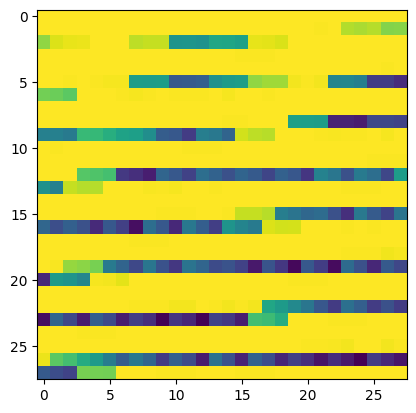

Real: 4
Predicted: 7
Rank of the correct answer: 7
Probabilities: [-0.13923861  0.04686906 -0.06146698  0.22333985  0.03899545  0.09829403
  0.29717571  0.49724887  0.07653677  0.02254479] 

Image no. 189


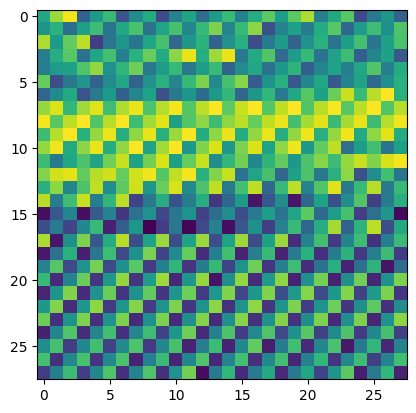

Real: 0
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.57550935  0.24298798  0.05323585  0.02712995 -0.0844268  -0.10802652
 -0.03721259 -0.21260422  0.63827463 -0.10432067] 

Image no. 190


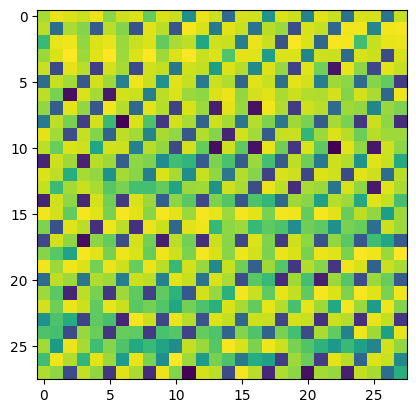

Real: 5
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.06813936  0.07099405  0.32059527  0.01285833  0.25311786  0.24818709
  0.22829009 -0.1411051   0.01621409  0.03754541] 

Image no. 191


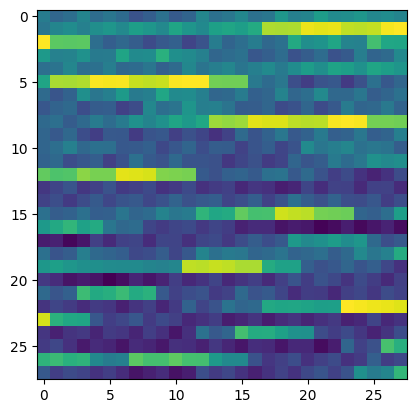

Real: 8
Predicted: 3
Rank of the correct answer: 7
Probabilities: [0.19559063 0.15454689 0.00698775 0.21394938 0.02112879 0.18457898
 0.13789977 0.00213357 0.04601602 0.06822545] 

Image no. 192


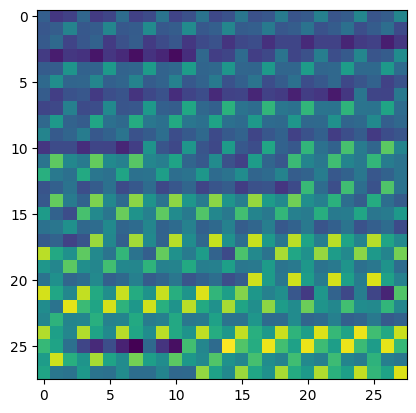

Real: 0
Predicted: 7
Rank of the correct answer: 5
Probabilities: [ 0.08678031  0.05417106  0.17629562  0.04490925  0.04579807  0.03783183
  0.10226674  0.24402902 -0.04752702  0.19419284] 

Image no. 194


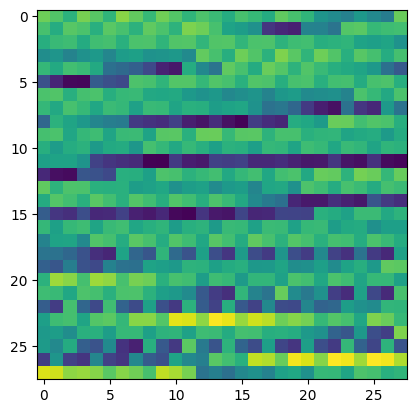

Real: 7
Predicted: 6
Rank of the correct answer: 2
Probabilities: [-0.01458397 -0.05941     0.00300179  0.15425443  0.11693546  0.08228074
  0.3106442   0.30250967  0.01860759  0.10991802] 

Image no. 195


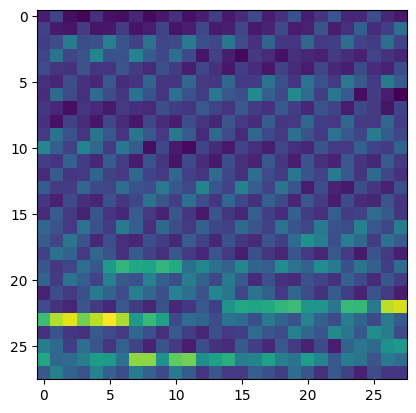

Real: 2
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.0877595   0.10577137  0.17422699  0.14599792  0.16635862  0.07536066
  0.18656065 -0.09176469  0.01903505  0.02898485] 

Image no. 197


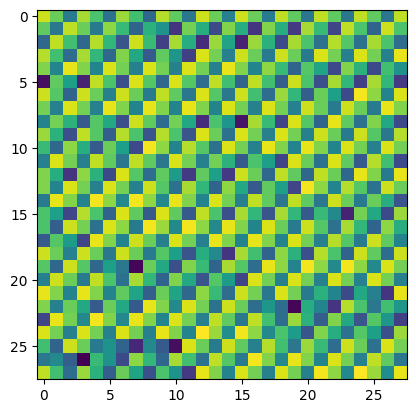

Real: 8
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.22317206 -0.07395341  0.24412498  0.13275018  0.13292339  0.12761508
  0.09971001 -0.02406733  0.24113916 -0.00433604] 

Image no. 199


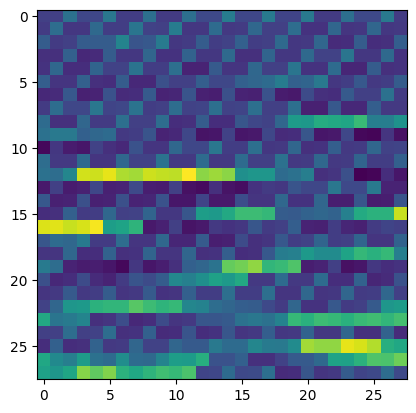

Real: 8
Predicted: 5
Rank of the correct answer: 6
Probabilities: [ 0.19388832 -0.00966635  0.14714534  0.1547181   0.13380839  0.19543921
 -0.00254483  0.06447015  0.0701089   0.06767165] 



In [ ]:
# Devoted solely to the MNIST dataset
def find_pos(item, lst):
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z]
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")

Respostas

1) O intervalo original (-16,14) nos da um melhor  c de 16 e 93,9 % de performace na busca grossa. Se alteramos para (-24, 10) obtemos c na ordem de 10-8 e 93,8% de performace na busca grossa. Portanto, o intervalo original não estava ruim, e mesmo com as modificações não conseguimos melhorar  o desempenho do classificador.

2) As máquinas de aprendizado extremo (EC03) têm uma capacidade de representação mais rica por não serem lineares e conseguirem aprender e se adaptar melhor ao dados e garantir uma boa generalização. Além disso, elas contam com o uso de funções de ativação como a ReLU que introduzem não linearidade na rede. Esses fatores combinados justificam um ganho de desempenho na taxa de acerto em relação aos classificadores lineares (EC01).

3) O intervalo inicial (-16,14) não estava ruim, pórem ao alterarmos para (-10,28) conseguimos uma melhora de 2% na performance do modelo. Apesar de uma performace de 45% não ser o ideal, é o que normalmente é obtido para a base cifar-10 nesse tipo de classificador, e portanto, a baixa performace no geral não se deve ao intervalo de busca em questao, mas sim devido a complexidade do dados.